In [170]:
from pathlib import Path
import ibllib.io.raw_data_loaders as raw
import matplotlib.pyplot as plt
import numpy as np
import sys

import utils as ut
import pandas as pd
import seaborn as sns

In [186]:
session_path = ut.selectFolder()


2023-02-05 18:34:32.973 python[10330:14032741] +[CATransaction synchronize] called within transaction
2023-02-05 18:34:32.977 python[10330:14032741] +[CATransaction synchronize] called within transaction
2023-02-05 18:34:38.307 python[10330:14032741] +[CATransaction synchronize] called within transaction


In [187]:
# load trial info from encoder 
data = raw.load_data(session_path)
trialinfo_df = raw.load_encoder_trial_info(session_path)
trialinfo_df

,trial_num,stim_pos_init,stim_contrast,stim_freq,stim_angle,stim_gain,stim_sigma,stim_phase,bns_ts
0,1,1,1.0,0.06,-0.785398,2,10000,0.000000,2022-09-19T18:09:09.6373376-07:00
1,2,-1,1.0,0.06,-0.785398,2,10000,126.059911,2022-09-19T18:09:18.8563968-07:00
2,3,1,1.0,0.06,0.785398,2,10000,160.653125,2022-09-19T18:09:23.0903552-07:00
3,4,1,1.0,0.06,0.785398,2,10000,164.539052,2022-09-19T18:09:31.0249472-07:00
4,5,-1,1.0,0.06,-0.785398,2,10000,164.956008,2022-09-19T18:09:35.2756224-07:00
...,...,...,...,...,...,...,...,...,...
322,323,1,0.5,0.06,0.785398,2,10000,171.391317,2022-09-19T18:37:48.2890368-07:00
323,324,-1,1.0,0.06,-0.785398,2,10000,4.554026,2022-09-19T18:37:52.7230848-07:00
324,325,1,1.0,0.06,0.785398,2,10000,132.268061,2022-09-19T18:37:56.8070784-07:00
325,326,1,1.0,0.06,0.785398,2,10000,81.007901,2022-09-19T18:38:01.4244992-07:00


In [188]:
# getting a list of correct trials 
correcttrials_lst = [d['trial_correct'] for d in data]
# correcting for the possibility of the last trial not being saved in the encoder_trial_info file 
diff = len(trialinfo_df) - len(correcttrials_lst)
if diff:
    print(f'warning, {diff} trial\'s is/are missing from the data dictionary')
    trialinfo_df = trialinfo_df[:-diff]

assert (len(trialinfo_df) == len(correcttrials_lst)), 'trialinfo_df and correcttrials_lst are not the same length'



warning, 1 trial's is/are missing from the data dictionary


In [189]:
# injecting trial-wise data into the trialinfo_df, changing values to 1 or 2 to conform to psytrack's format

"""correct -- the accurarcy of the choice (1 = correct, 2 = incorrect)"""
trialinfo_df.loc[:, 'correct'] = [1 if x else 0 for x in correcttrials_lst]


"""answer -- the correct answer choice """
# changing stim angle value to 0 (- left) or 1 (+ right)
def changeVals(x):
    if x < 0:
        return 1
    else:
        return 2
trialinfo_df['answer'] = trialinfo_df['stim_angle'].apply(changeVals)


# adds a column for when the wheel is turned to the left:
trialinfo_df["LeftTurn"] = ((trialinfo_df["stim_angle"] < 0) & (trialinfo_df["correct"] == 1)) | ((trialinfo_df["stim_angle"] >= 0) & (trialinfo_df["correct"] == 0))
trialinfo_df["LeftTurn"] = trialinfo_df["LeftTurn"].astype(int)


# adds signed contrast
trialinfo_df.loc[:,'signedContrast'] = trialinfo_df.stim_contrast.values*trialinfo_df.stim_pos_init.values


# # changes the contrast column by multiplying by 100 and making them integers
# trialinfo_df['stim_contrast'] = (trialinfo_df['stim_contrast'] * 100).astype(np.int64)





/var/folders/8f/5wxb25nd0y12wfq_xr45zv5w0000gn/T/ipykernel_10330/2659607023.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trialinfo_df.loc[:, 'correct'] = [1 if x else 0 for x in correcttrials_lst]
/var/folders/8f/5wxb25nd0y12wfq_xr45zv5w0000gn/T/ipykernel_10330/2659607023.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trialinfo_df['answer'] = trialinfo_df['stim_angle'].apply(changeVals)
/var/folders/8f/5wxb25nd0y12wfq_xr45zv5w0000gn/T/ipykernel_10330/2659607023.py:18: SettingWithCopyWarning: 
A

In [190]:
trialinfo_df.head(20)

,trial_num,stim_pos_init,stim_contrast,stim_freq,stim_angle,stim_gain,stim_sigma,stim_phase,bns_ts,correct,answer,LeftTurn,signedContrast
0,1,1,1.0,0.06,-0.785398,2,10000,0.000000,2022-09-19T18:09:09.6373376-07:00,1,1,1,1.0
1,2,-1,1.0,0.06,-0.785398,2,10000,126.059911,2022-09-19T18:09:18.8563968-07:00,1,1,1,-1.0
2,3,1,1.0,0.06,0.785398,2,10000,160.653125,2022-09-19T18:09:23.0903552-07:00,1,2,0,1.0
3,4,1,1.0,0.06,0.785398,2,10000,164.539052,2022-09-19T18:09:31.0249472-07:00,1,2,0,1.0
4,5,-1,1.0,0.06,-0.785398,2,10000,164.956008,2022-09-19T18:09:35.2756224-07:00,1,1,1,-1.0
5,6,-1,1.0,0.06,-0.785398,2,10000,272.907038,2022-09-19T18:09:39.4929536-07:00,1,1,1,-1.0
6,7,1,1.0,0.06,0.785398,2,10000,207.019933,2022-09-19T18:09:43.6436224-07:00,0,2,1,1.0
7,8,-1,1.0,0.06,-0.785398,2,10000,187.812362,2022-09-19T18:09:56.8957440-07:00,1,1,1,-1.0
8,9,1,1.0,0.06,0.785398,2,10000,290.638073,2022-09-19T18:10:00.9963904-07:00,1,2,0,1.0
9,10,-1,1.0,0.06,-0.785398,2,10000,238.250604,2022-09-19T18:10:06.1638912-07:00,1,1,1,-1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/8f/5wxb25nd0y12wfq_xr45zv5w0000gn/T/ipykernel_10330/3572771070.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels =np.round(np.arange(-0.2,1.2,0.2),2),fontsize = 15)


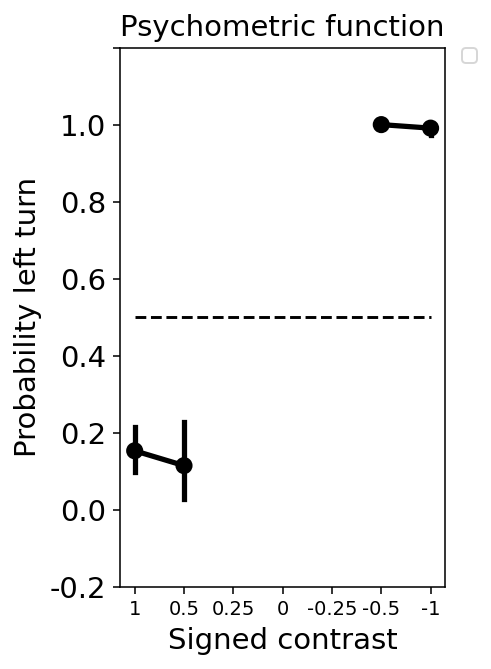

In [191]:
dtp = trialinfo_df
x = 'signedContrast'
y = 'LeftTurn'
hue = 'mouse'
minTrial = 30
maxTrial = 1000

fig,ax = plt.subplots(1,1,figsize = (3,5))
order = [1,0.5,0.25,0,-0.25,-0.5,-1]
#ax = sns.pointplot(data = data,x=x,y=y,hue=hue,palette= palette,order = order,alpha = 0.5,aspect = 1.5,dodge=0.2)
ax = sns.pointplot(data = dtp,x=x,y=y,color='black',order = order)
#ax = sns.pointplot(data = data,x=x,y=y)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Psychometric function',fontsize = 15)
ax.set_xlabel('Signed contrast',fontsize = 15)
ax.set_ylabel('Probability left turn',fontsize = 15)
ax.set_ylim(-0.2,1.2)
#ax.set_xticklabels([-45,45],fontsize = 15)
ax.set_yticklabels(labels =np.round(np.arange(-0.2,1.2,0.2),2),fontsize = 15)
ax.axes.hlines(0.5,0,6,linestyles='dashed',color='black')
# ax.axes.hlines(0.70,0,data[x].max()-data[x].min(),linestyles='dashed',color='black')
plt.show()

In [192]:
D = dict()
D['name'] = ut.writtenInput('Enter the name of the subject: ')
# D['y'] represents direction of the turn (0 is right, 1 is left) for each trial
D['y'] = trialinfo_df.LeftTurn.values+1 
# D['y']

In [193]:
varstoadd = ['stim_angle','stim_contrast']
outputs = []
for name in varstoadd:
    currenttrial = trialinfo_df[name].values
    prevtrial = np.insert(trialinfo_df[name].values[:-1],0,trialinfo_df[name].values[0])
    assert len(currenttrial) == len(prevtrial)
    both = np.stack([currenttrial,prevtrial]).T
    outputs.append(both)
# outputs is a list of 2d arrays, each array has 2 columns, the first column is the current trial's value, the second column is the previous trial's value
# there will be one stack for each variable in varstoadd

In [194]:
D['inputs'] = dict()
for idx,name in enumerate(varstoadd):
    D['inputs'][name] = outputs[idx]

In [121]:
D['dayLength'][0] = len(data)

KeyError: 'dayLength'

In [195]:
D['answer'] = trialinfo_df['answer'].to_numpy()
D['correct'] = trialinfo_df['correct'].to_numpy()

In [196]:
np.savez('D.npz', **D)

# Moving onto psytrack

In [197]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.rcParams['figure.dpi'] = 140

import psytrack as psy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [198]:
print("The keys of the dict:\n   ", list(D.keys()))
print("The keys of inputs are\n :", list(D['inputs'].keys()))
inputs = D['inputs']

The keys of the dict:
    ['name', 'y', 'inputs', 'answer', 'correct']
The keys of inputs are
 : ['stim_angle', 'stim_contrast']


In [199]:
print("The shape of y:   ", D['y'].shape) # y is the animal's choice (0 or 1)
print("The number of trials:   N =", D['y'].shape[0])
print("The unique entries of y:   ", np.unique(D['y']))

The shape of y:    (326,)
The number of trials:   N = 326
The unique entries of y:    [1 2]


 `x[7,0]` would encode the stimulus heard on the 7th trial where as both `x[6,0]` and `x[7,1]` would encode the stimulus heard on the 6th trial. The information is redundant, but allows for all feasible regressors to predicting behavior of trial $i$ to be accessible by referencing the $i^{th}$ row of the respective input array.See the below for examples:

In [200]:
print("The keys of inputs:\n   ", list(D['inputs'].keys()))

print("\nThe shape of stim_angle:", D['inputs']['stim_angle'].shape)
print("stim_angle[7]   : ", D['inputs']['stim_angle'][7])
print("stim_angle[6,0] : ", D['inputs']['stim_angle'][6,0])
print("stim_angle[7,1] : ", D['inputs']['stim_angle'][7,1])

print(inputs['stim_angle'][4])

The keys of inputs:
    ['stim_angle', 'stim_contrast']

The shape of stim_angle: (326, 2)
stim_angle[7]   :  [-0.7853982  0.7853982]
stim_angle[6,0] :  0.7853982
stim_angle[7,1] :  0.7853982
[-0.7853982  0.7853982]


# Weights

In [201]:
weights = {
    'bias': 1,
    'stim_angle': 1,
    'stim_contrast': 1
}

# marking the total number of weights:
K = np.sum([weights[i] for i in weights.keys()])

# Hyperparameters

In [202]:
hyper = {
    'sigInit': 2**4, # set to a single, large value for all weights. Will not be optimize further. not sure why?
    'sigma': [2**-4.] * K, # each weight willhave it's own sigma optimized, but all are initialized the same 
    'sigDay': None # indicates that session boundaries will be ignored in the optimization
}

In [203]:
optList = ['sigma']

"""
Other options:
* nothing
* 'sigDay'
* 'sigma'
* 'sigma, 'sigDay'
"""

"\nOther options:\n* nothing\n* 'sigDay'\n* 'sigma'\n* 'sigma, 'sigDay'\n"

In [204]:
new_D = psy.trim(D, END=1000)

In [205]:
hyp, evd, wMode, hess_info = psy.hyperOpt(new_D, hyper, weights, optList)

In [206]:
seed = 31
num_weights = 3
num_trials = 5000
simData = psy.generateSim(K = num_weights, N = num_trials, hyper = hyper, boundary = 6.0, iterations = 1, seed = seed, savePath = None)

KeyError: 'stim_angle'

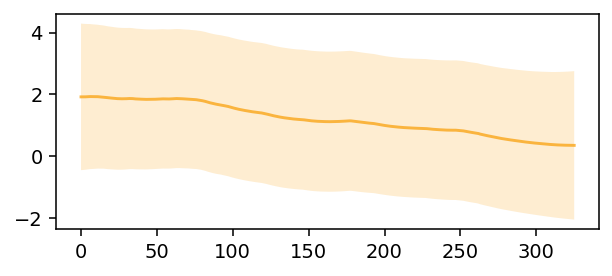

In [207]:
psy.plot_weights(wMode, weights, errorbar=hess_info["W_std"])